In [1]:
# RANDOM FOREST EXERCISE (n_estimators, multiple decision trees concept)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
from matplotlib import pyplot as plt

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target', 'flower_name'], axis='columns'), df.target, test_size=0.2)

In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
model.score(X_test, y_test)

0.9333333333333333

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 0, 2])

In [11]:
y_test

63     1
59     1
114    2
28     0
126    2
9      0
117    2
108    2
132    2
24     0
23     0
74     1
79     1
106    2
4      0
34     0
103    2
37     0
61     1
120    2
40     0
128    2
8      0
53     1
67     1
43     0
26     0
119    2
15     0
100    2
Name: target, dtype: int32

In [12]:
cm = confusion_matrix(y_test, y_pred)

Text(45.722222222222214, 0.5, 'Truth')

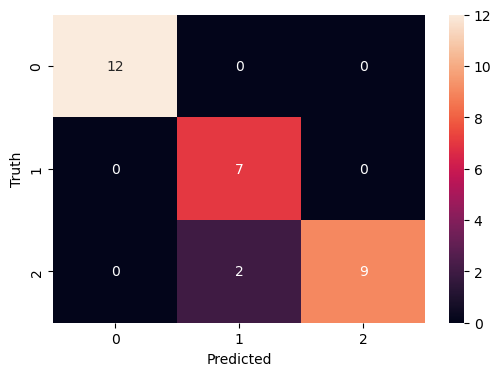

In [13]:
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")